In [9]:
from os import path
import numpy as np
import pandas as pd
import math
from IPython.display import display

if path.exists("data/AnthonyBeer.csv"):
    beer_df = pd.read_csv("data/AnthonyBeer.csv")
    display(beer_df.head())
else:
    print("File does not exist")

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Shiner Oktoberfest,Spoetzl Brewery,Märzen,5.7,18,NaN,NaN,NaN,NaN,NaN,...,NaN,45008985,6348,1179,NaN,3.45,3.45,NaN,0,0
1,ESB,Redhook Brewery,Extra Special / Strong Bitter,5.8,28,NaN,NaN,NaN,NaN,NaN,...,NaN,45009120,3245,1051,NaN,3.44,3.44,NaN,0,0
2,Ellie's Brown Ale,Avery Brewing Co.,Brown Ale - American,5.5,28,NaN,NaN,NaN,NaN,NaN,...,NaN,45009485,6206,62,NaN,3.62,3.62,NaN,0,0
3,Pumpkin Beer,O'Fallon Brewery,Pumpkin / Yam Beer,5.6,11,NaN,NaN,NaN,NaN,NaN,...,NaN,45009598,9371,924,NaN,3.64,3.64,NaN,1,0
4,Messiah Nut Brown Ale,Shmaltz Brewing Company,Brown Ale - American,5.2,0,Nice almost chocolatey taste.,NaN,NaN,NaN,NaN,...,NaN,45138709,7094,1137,NaN,3.47,3.47,NaN,0,0


In [10]:
beer_df = beer_df[~beer_df["rating_score"].isna()]

In [28]:
def simplify_beer_type(row):
    beer_type = row["beer_type"]
    try:
        dash_index = beer_type.index(" - ")
        return beer_type[0:dash_index]
    except:
        return beer_type

beer_df["simple_beer_type"] = beer_df.apply(simplify_beer_type, axis=1)
print("Number of beer types: " + str(beer_df["simple_beer_type"].drop_duplicates().shape[0]))
beer_df.to_csv("data/simplified_data.csv")

Number of beer types: 54


In [29]:
beer_df.keys()

Index(['beer_name', 'brewery_name', 'beer_type', 'beer_abv', 'beer_ibu',
       'comment', 'venue_name', 'venue_city', 'venue_state', 'venue_country',
       'venue_lat', 'venue_lng', 'rating_score', 'created_at', 'checkin_url',
       'beer_url', 'brewery_url', 'brewery_country', 'brewery_city',
       'brewery_state', 'flavor_profiles', 'purchase_venue', 'serving_type',
       'checkin_id', 'bid', 'brewery_id', 'photo_url', 'global_rating_score',
       'global_weighted_rating_score', 'tagged_friends', 'total_toasts',
       'total_comments', 'simple_beer_type'],
      dtype='object')

In [15]:
beer_df.shape[0]

946

In [16]:
beer_types_df = beer_df[["beer_type", "beer_name"]].groupby("beer_type").count().reset_index().rename({"beer_name": "# of checkins"}, axis=1)
beer_types_df.sort_values(by="# of checkins", ascending=False).head(10)

,beer_type,# of checkins
36,IPA - American,112
64,Pale Ale - American,81
50,Lager - American,49
52,Lager - American Light,42
106,Wheat Beer - American Pale Wheat,31
69,Pilsner - German,23
58,Lager - Pale,22
8,Blonde Ale,22
46,IPA - Session / India Session Ale,21
44,IPA - New England,21


In [17]:
beer_simple_types_df = beer_df[["simple_beer_type", "beer_name"]].groupby("simple_beer_type").count().reset_index().rename({"beer_name": "# of checkins"}, axis=1)
beer_simple_types_df.sort_values(by="# of checkins", ascending=False).head(10)

,simple_beer_type,# of checkins
27,IPA,192
30,Lager,157
34,Pale Ale,98
47,Stout,83
35,Pilsner,52
51,Wheat Beer,52
10,Brown Ale,24
36,Porter,23
8,Blonde Ale,22
14,Cream Ale,17


In [18]:
beer_df[["beer_url"]].drop_duplicates().shape[0]

766

In [25]:
beer_types_ratings_df = beer_df[["simple_beer_type", "rating_score"]].groupby("simple_beer_type").mean().reset_index().rename({"rating_score": "avg rating"}, axis=1)
beer_types_ratings_df = beer_types_ratings_df.merge(beer_simple_types_df, on="simple_beer_type")
beer_types_ratings_df = beer_types_ratings_df[beer_types_ratings_df["# of checkins"] > 3]
display(beer_types_ratings_df.sort_values("avg rating", ascending=False).head(10).reset_index())
display(beer_types_ratings_df.sort_values("avg rating", ascending=True).head(10).reset_index())

,index,simple_beer_type,avg rating,# of checkins
0,36,Porter,3.989130,23
1,42,Scotch Ale / Wee Heavy,3.875000,4
2,27,IPA,3.798177,192
3,10,Brown Ale,3.781250,24
4,47,Stout,3.686747,83
5,18,Extra Special / Strong Bitter,3.681818,11
6,34,Pale Ale,3.663265,98
7,38,Red Ale,3.593750,16
8,37,Pumpkin / Yam Beer,3.550000,10
9,6,Belgian Strong Golden Ale,3.550000,5


,index,simple_beer_type,avg rating,# of checkins
0,44,Shandy / Radler,1.562500,4
1,45,Sour,1.875000,12
2,30,Lager,2.221338,157
3,22,Fruit Beer,2.454545,11
4,0,Altbier,3.050000,5
5,32,Märzen,3.125000,8
6,24,Golden Ale,3.125000,12
7,14,Cream Ale,3.191176,17
8,25,Hefeweizen,3.308824,17
9,4,Belgian Quadrupel,3.375000,6


In [30]:
beer_names_df = beer_df[["beer_name", "brewery_name", "beer_type"]].groupby(["beer_name", "brewery_name"]).count().reset_index().rename({"beer_type": "# of checkins"}, axis=1)
beer_names_df.sort_values(by="# of checkins", ascending=False).head(10)

,beer_name,brewery_name,# of checkins
114,Bud Light,Anheuser-Busch,8
719,Unfiltered Wheat Beer,Boulevard Brewing Co.,6
642,Stag,Pabst Brewing Company,5
513,Pale Ale,Boulevard Brewing Co.,5
658,Strawberry Blonde,Border Brewing Company,5
18,8-Bit Pale Ale,Tallgrass Brewing Company,4
637,Spooky Boy,McDonough Brewery,4
296,Guinness Draught,Guinness,4
686,Tecate,Cervecería Cuauhtémoc Moctezuma S.A. de C.V.,4
6,16-Bit Double Pale Ale (2015),Tallgrass Brewing Company,4


In [31]:
beer_df[["beer_name", "beer_abv", "beer_ibu", "rating_score"]].sort_values(by="beer_abv", ascending=False).head(10)

,beer_name,beer_abv,beer_ibu,rating_score
546,Bomb!,13.0,65,3.75
26,Belzebuth (13%),13.0,0,4.00
631,Pappy Burleson (2017),13.0,0,3.00
736,Speedway Stout,12.0,70,4.75
149,Rye-on-Rye,12.0,47,4.25
932,Prickly Pear Belgian,12.0,0,3.25
259,Rye-on-Rye X - Sazerac,11.8,29,4.00
525,Whiskey Barrel Stout,11.8,32,4.50
190,Bourbon Barrel Quad (2015),11.8,19,4.00
748,Big Bad Baptista,11.7,65,4.75


In [32]:
beer_df["beer_abv"].describe()

count    946.000000
mean       5.776237
std        1.584075
min        0.000000
25%        4.800000
50%        5.500000
75%        6.500000
max       13.000000
Name: beer_abv, dtype: float64

In [43]:
beer_abv_ratings_df = beer_df[["beer_abv", "rating_score"]]
beer_abv_ratings_df["beer_abv_bucket"] = beer_abv_ratings_df.apply(lambda row: math.floor(row["beer_abv"]), axis=1)
beer_abv_ratings_df = beer_abv_ratings_df.drop(columns=["beer_abv"], axis=1)
beer_abv_ratings_counts_df = beer_abv_ratings_df.groupby("beer_abv_bucket").count().reset_index()
beer_abv_ratings_df = beer_abv_ratings_df.groupby("beer_abv_bucket").mean().reset_index()
beer_abv_ratings_df = beer_abv_ratings_df.merge(beer_abv_ratings_counts_df, on="beer_abv_bucket").rename({"rating_score_x": "avg_rating", "rating_score_y": "counts"}, axis=1)
beer_abv_ratings_df

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,beer_abv_bucket,avg_rating,counts
0,0,3.687500,8
1,3,1.166667,6
2,4,2.769763,253
3,5,3.418382,340
4,6,3.542453,159
5,7,3.820707,99
6,8,3.621951,41
7,9,3.346154,13
8,10,3.354167,12
9,11,4.194444,9


In [44]:
import math
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
register_matplotlib_converters()
rcParams['figure.figsize'] = 18.5, 7.5
rcParams['font.size'] = 16

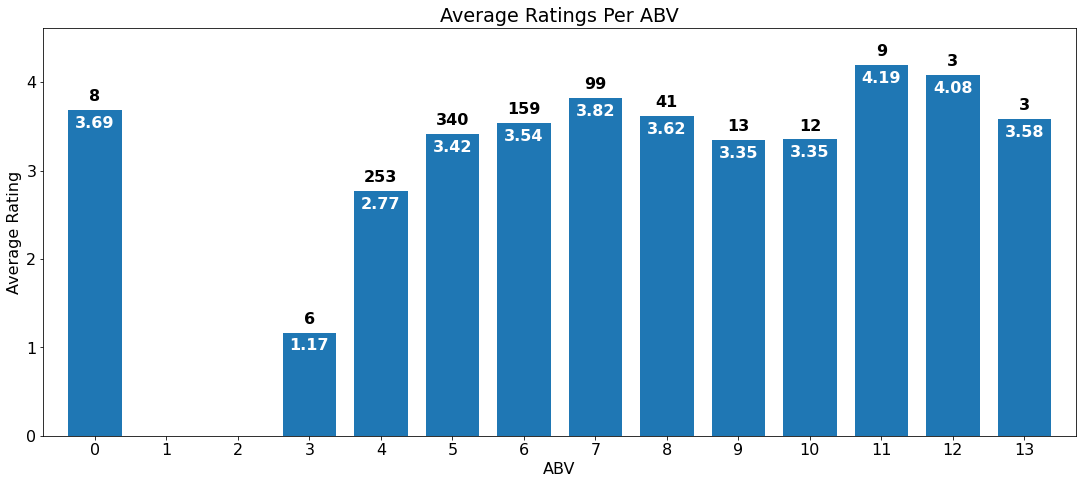

In [77]:
def show_ratings_by_abv(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars 
    ax.bar(data[:,0], data[:,1], width)
    for i, count in enumerate(data[:,2]):
        ax.text(data[i,0], data[i,1] + 0.1, "{}".format(math.floor(count)), color='black', fontweight='bold', horizontalalignment='center')
    for i, hours in enumerate(data[:,1]):
        ax.text(data[i,0], data[i,1] - 0.2, "{:.2f}".format(hours), color='white', fontweight='bold', horizontalalignment='center')
    
    plt.title("Average Ratings Per ABV")
    plt.xticks(ticks=range(0, math.floor(data[len(data)-1,0]) + 1))
    plt.xlabel("ABV")
    plt.ylabel("Average Rating")
    plt.margins(0.025, 0.1)

data = beer_abv_ratings_df.to_numpy()
show_ratings_by_abv(data)

plt.show()

In [78]:
beer_serving_type_df = beer_df[~beer_df["serving_type"].isna()]
beer_serving_type_df.shape[0]

431

In [80]:
beer_serving_ratings_df = beer_serving_type_df[["serving_type", "rating_score"]]
beer_serving_ratings_count_df = beer_serving_ratings_df.groupby("serving_type").count().reset_index()
beer_serving_ratings_df = beer_serving_ratings_df.groupby("serving_type").mean().reset_index()
beer_serving_ratings_df = beer_serving_ratings_df.merge(beer_serving_ratings_count_df, on="serving_type").rename({"rating_score_x": "avg_rating", "rating_score_y": "counts"}, axis=1)
beer_serving_ratings_df.sort_values(by="avg_rating", ascending=False)

,serving_type,avg_rating,counts
4,Growler,4.083333,6
2,Crowler,3.800000,5
3,Draft,3.531707,205
6,Taster,3.505435,46
5,Nitro,3.333333,3
0,Bottle,3.262195,41
1,Can,2.932000,125


In [82]:
beer_serving_type_df[beer_serving_type_df["serving_type"] == "Can"]["rating_score"].describe()

count    125.000000
mean       2.932000
std        1.296854
min        0.250000
25%        2.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating_score, dtype: float64

In [95]:
beer_big_rating_df = beer_df[beer_df["rating_score"] == 5.0][["beer_name", "brewery_name"]]
beer_big_rating_counts_df = beer_big_rating_df.groupby("beer_name").count()
beer_big_rating_df = beer_big_rating_df.merge(beer_big_rating_counts_df, on="beer_name").drop_duplicates()
beer_big_rating_df = beer_big_rating_df.rename({"brewery_name_x": "brewer_name", "brewery_name_y": "count"}, axis=1)
beer_big_rating_df.sort_values(by="count", ascending=False)

,beer_name,brewer_name,count
8,Stag,Pabst Brewing Company,3
0,Green Chili Beer,Flat Branch Pub & Brewing,2
2,Hazelnut Brown Nectar,Rogue Ales,2
4,Two Hearted Ale,Bell's Brewery,1
5,Kolsch,Franconia Brewing Company,1
6,Sweet Baby Jesus!,DuClaw Brewing Company,1
7,Imperial Stout X - Coconut,Boulevard Brewing Co.,1
11,Generation 1,Firestone Walker Brewing Company,1
12,Wedding Ale,Cold Iron Brewing,1
13,Scottish Wedding Ale,Cold Iron Brewing,1


In [107]:
venue_df = beer_df[["venue_name", "venue_city"]].groupby("venue_name").count().reset_index()
venue_df = venue_df.rename({"venue_city": "count"}, axis=1)
venue_df.sort_values(by="count", ascending=False).head(10).reset_index(drop=True)

,venue_name,count
0,HI-DIVE Lounge,63
1,International Tap House,25
2,Double Shift Brewing Company,24
3,Ruins Pub,22
4,Border Brewing Company,19
5,Under The KCTV5 Tower,19
6,Boulevard Brewing Beer Hall,16
7,Torn Label Brewing Company,14
8,Up-Down,13
9,Union Station Grand Hall,13


In [116]:
venue_ratings_df = beer_df[["venue_name", "rating_score"]].groupby("venue_name").mean().reset_index()
venue_ratings_df = venue_ratings_df.merge(beer_df[["venue_name", "rating_score"]].groupby("venue_name").count().reset_index(), on="venue_name")
venue_ratings_df = venue_ratings_df.rename({"rating_score_x": "avg_rating", "rating_score_y": "count"}, axis=1)
venue_ratings_df = venue_ratings_df[venue_ratings_df["count"] > 5]
venue_ratings_df.sort_values(by="avg_rating", ascending=False).head(10).reset_index(drop=True)

,venue_name,avg_rating,count
0,Elizabeth Warren Campaign Office,3.875000,6
1,Double Shift Brewing Company,3.802083,24
2,Torn Label Brewing Company,3.785714,14
3,Grinders,3.777778,9
4,Border Brewing Company,3.671053,19
5,Under The KCTV5 Tower,3.671053,19
6,The Ginger Man,3.666667,6
7,City Barrel Brewing Company,3.625000,6
8,Boulevard Brewing Beer Hall,3.625000,16
9,Cold Iron,3.611111,9


In [122]:
beer_flavor_profiles_df = beer_df[~beer_df["flavor_profiles"].isna()]
beer_flavor_profiles_df.shape[0]

451

In [132]:
flavor_profiles = set()
for flavor_profiles_list in beer_flavor_profiles_df.apply(lambda row: row["flavor_profiles"].split(","), axis=1).to_numpy():
    for flavor in flavor_profiles_list:
        flavor_profiles.add(flavor)
len(flavor_profiles)

100